**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_chipseq/fcc_astarr_macs_input_overlap/summary"
txt_fname = "region.coverage.encode_chipseq_histone.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_coverage_chipseq_histone = dat
print(dim(dat))
head(dat)

[1] 2850798      12


Region,Size,Covered,Sum,Mean0,Mean,Min,Max,Annotation_A,Annotation_B,Target,Index_File
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr1:10038-10405,367,367,73.3865,0.1999630,0.1999630,0.07471,0.25932,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF202EVH,H2AFZ,ENCFF202EVH
chr1:14282-14614,332,332,24.8037,0.0747100,0.0747100,0.07471,0.07471,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF202EVH,H2AFZ,ENCFF202EVH
chr1:16025-16338,313,313,18.5679,0.0593224,0.0593224,0.02044,0.07471,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF202EVH,H2AFZ,ENCFF202EVH
chr1:17288-17689,401,401,29.9587,0.0747100,0.0747100,0.07471,0.07471,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF202EVH,H2AFZ,ENCFF202EVH
chr1:28934-29499,565,565,42.2111,0.0747100,0.0747100,0.07471,0.07471,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF202EVH,H2AFZ,ENCFF202EVH
chr1:115429-115969,540,540,246.0580,0.4556630,0.4556630,0.07471,1.40070,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF202EVH,H2AFZ,ENCFF202EVH


In [3]:
dat = dat_coverage_chipseq_histone
dat = dat %>% 
    dplyr::group_by(Region, Target) %>% 
    dplyr::summarise(Score = mean(Mean0), .groups = 'drop')

dat_coverage_summary = dat
print(dim(dat))
head(dat)

[1] 1800504       3


Region,Target,Score
<chr>,<chr>,<dbl>
chr10:100009244-100010395,H2AFZ,14.65310000
chr10:100009244-100010395,H3K27ac,3.36609000
chr10:100009244-100010395,H3K27me3,0.09102275
chr10:100009244-100010395,H3K36me3,0.18934650
chr10:100009244-100010395,H3K4me1,4.09280500
chr10:100009244-100010395,H3K4me2,25.66270000


In [4]:
dat = dat_coverage_summary
any(is.na(dat$Score))

[1] FALSE

In [5]:
dat = dat_coverage_summary
dat = dat %>% tidyr::spread(Target, Score)

mat_coverage_summary = dat
print(dim(dat))
head(dat)

[1] 150042     13


Region,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100028014-100029653,0.5440270,1.547830,0.034976800,0.7343255,1.618630,0.421442,0.2467395,0.0621427,0.5230985,0.229260,0.301103,0.267525
chr1:100036895-100039189,11.8517000,118.523000,0.045839000,1.1265035,0.818885,63.283200,192.0023750,74.0817000,87.7667000,0.326536,0.686410,0.522124
chr1:100046252-100046533,0.0520506,0.769209,0.035720165,0.1937501,4.162750,0.758239,0.5511430,25.7854000,0.7853099,1.266150,0.112500,1.349110
chr1:100048290-100048918,0.1297520,2.315990,0.236703100,0.7268745,4.381910,0.728546,0.4523622,26.2643000,0.7424300,1.480710,0.261518,4.739960
chr1:100050225-100050529,0.2726720,4.912780,0.004278435,4.0054800,5.371100,2.067760,0.6200202,22.3808000,1.0369080,0.633395,0.267164,1.828230
chr1:100064757-100065161,0.0940149,0.863932,0.033456395,1.8845535,1.206043,0.295002,0.2319361,0.7202330,1.6244865,0.310127,0.214077,0.360903


In [6]:
any(is.na(mat_coverage_summary))

[1] FALSE

In [7]:
library(pheatmap)

In [8]:
dat = mat_coverage_summary
dat = dat %>% column_to_rownames(var = "Region")
head(dat)

,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100028014-100029653,0.5440270,1.547830,0.034976800,0.7343255,1.618630,0.421442,0.2467395,0.0621427,0.5230985,0.229260,0.301103,0.267525
chr1:100036895-100039189,11.8517000,118.523000,0.045839000,1.1265035,0.818885,63.283200,192.0023750,74.0817000,87.7667000,0.326536,0.686410,0.522124
chr1:100046252-100046533,0.0520506,0.769209,0.035720165,0.1937501,4.162750,0.758239,0.5511430,25.7854000,0.7853099,1.266150,0.112500,1.349110
chr1:100048290-100048918,0.1297520,2.315990,0.236703100,0.7268745,4.381910,0.728546,0.4523622,26.2643000,0.7424300,1.480710,0.261518,4.739960
chr1:100050225-100050529,0.2726720,4.912780,0.004278435,4.0054800,5.371100,2.067760,0.6200202,22.3808000,1.0369080,0.633395,0.267164,1.828230
chr1:100064757-100065161,0.0940149,0.863932,0.033456395,1.8845535,1.206043,0.295002,0.2319361,0.7202330,1.6244865,0.310127,0.214077,0.360903


In [16]:
set.seed(123)
idx = sample(1:nrow(dat), size = 10000)
print(length(idx))

[1] 10000


In [17]:
tmp = dat[idx,]
dim(tmp)

[1] 10000    12

In [18]:
vec = brewer.pal(n = 7, name = "Reds")
vec = c("#FFFFFF", vec)

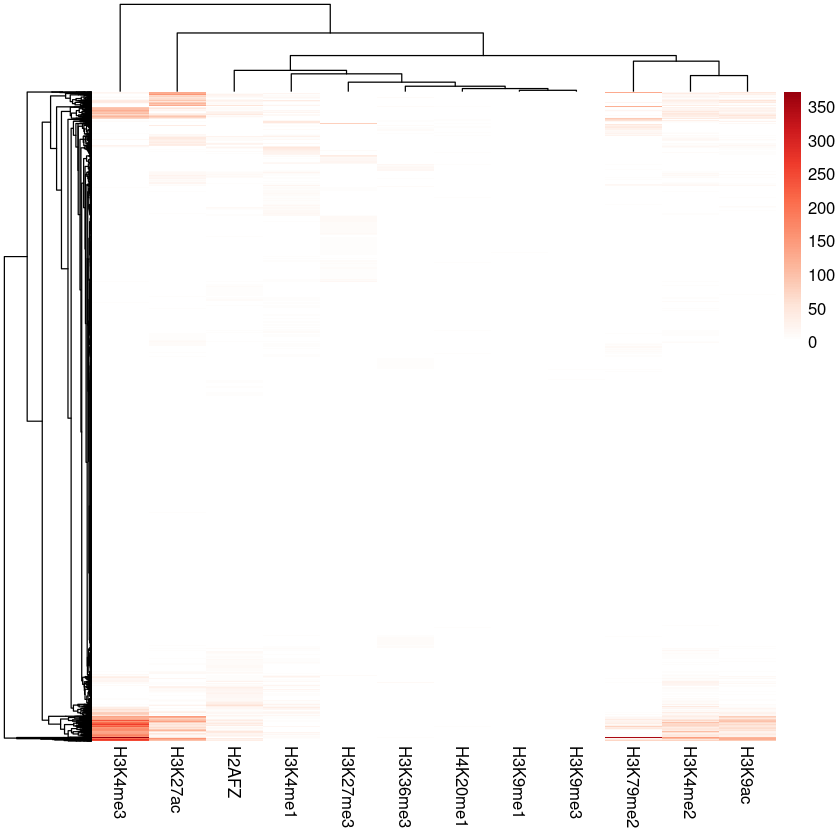

In [19]:
pheatmap(
    tmp, 
    color = colorRampPalette(vec)(100),
    show_rownames = FALSE)